# Exercise Sheet 1: Neurons

In [1]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt

## Task 1: The logistic function (1 point - programming)
Write a function "logistic(h,a=1)" resembling the logistic function and a second function "signtrafunc" the binary logistic tranfer function equivalent as a function of the sign of the input. Also write a function "dlogistic(h,a=1)" resembling the derivative of the logistic function. Similarly, write a "gaussRBF(h,a=1)" resembling the gaussian Radial Basis Function and "dgaussRBF(h,a=1)" its derivative.

Plot each of them in the range of -10 to 10 together with their derivative (except for the binary function) with plt.plot().

For defining the sign-based transfer function the inline definition of functions using the syntax trafunc=lambda x: f(x) might be handy, please write the logistic function, however, as a classical function definition. The a=1 in the function definition sets the default to a=1 so the function needs only 1 argument by default.

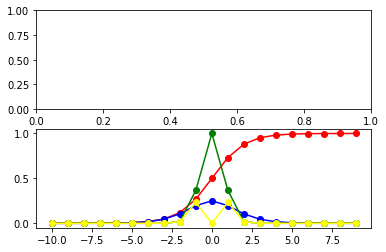

In [2]:

def logistic(h,a=1):
    return (1/(a + np.exp(-h)))

signtrafunc=lambda x: True if x>= 0 else False
    
def dlogistic(h, a=1):
    return logistic(h)*(1-logistic(h))

def gaussRBF(h,a=1):
    return np.exp(-(a*h)**2)

def dgaussRBF(h,a=1):
    return gaussRBF(h)*(1-gaussRBF(h))

h = np.arange(-10,10)

ax1,ax2 = plt.subplots(2)
plt.plot(h, logistic(h),'-o',color = 'red')
plt.plot(h, dlogistic(h), '-o', color = 'blue')
plt.plot(h, gaussRBF(h), '-o', color = 'green')
plt.plot(h, dgaussRBF(h), '-o', color = 'yellow')


## Task 2: Building an artificial neuron  (2 points - programming)
Define a class "neuron" resembling a simple perceptron. See https://docs.python.org/3/tutorial/classes.html for help on classes.

It should have the attributes "neuron.w" for the weights, "neuron.b" for the bias, the methods "neuron.trafunc(self,x)" for the transfer function, "neuron.dtrafunc(self,h)"  for the derivative of the transfer function and the met#hod "neuron.out(self,h)" to calculate the output for input *x* and *h*, respectively. 

Build a constructor method "\__init\__(self,...)", where self refers to the object itself, which assigns the weight vector *x*, the bias *b* , the transfer function "trafunc" and it's derivative "dtrafunc" to the neuron.

In [3]:
class neuron:
    
    def __init__(self):
        return 
    def out(self, x):
        return 
            

## Task 3: Use an artificial neuron (3 points - thinking and programming)
Use instances of the neuron class above to build the equivalents to logical "or" and "and"-functions and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]) by setting the weights and bias manually.

First, use the sign-based transfer function to solve the task with exact solution and then apply the same weights w and bias b on a neuron with the logistic and gaussian RBF transfer functions.

What's the difference?

*Hint: if you haven't succeeded with Task 2, you can solve Task 3 analytically and write down the needed weights and results.*

## Task 4: The current density (4 points - analytic derivation)
Analytically derive the current density $\vec{J}=-\sigma\nabla\phi$ of a dipole field at origin step-by-step from the potential equation $\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\vec{r}}{\left|\vec{r}\right|^3}$ in Cartesian coordinates.

To this extent you will need to build the gradient $\nabla=\left(
\begin{array}{c}
	\frac{\delta}{\delta x}\\
	\frac{\delta}{\delta y}\\
	\frac{\delta}{\delta z}
\end{array}
\right)$!

You can take the dipolar moment $\vec{p}$ to be a constant vector $\vec{p}=\left(
\begin{array}{c}
	p_x\\
	p_y\\
	p_z
\end{array}
\right)$. 

The vector $\vec{r}=\left(
\begin{array}{c}
	x\\
	y\\
	z
\end{array}
\right)$ is the coordinates in cartesian coordinates and  the norm is the euclidean norm $\left|\vec{r}\right|=\sqrt{x^2+y^2+z^2}$.

$\sigma$ is the specific conductivity of the material (a constant).

*Hint: You can hand in the solution in your format of choice: Write direclty below (Markdown takes latex within $$, jsut double-click on the cell below), Pdf from Latex or Word, scan or photo of a hand-written derivation, etc....*

### Solution:
$\vec{J}=-\sigma \nabla \phi=$

## Task 5: Electrical Field strength & potential of a dipole (5 points - programming)
Write a python function resembling the electrical field potential $\phi(\vec{r},\vec{r}_0)$ and another one for the field strength $\vec{E}$ of a dipole in infinite charge free space at point $\vec{r}_0$ in Cartesian coordinates. The function should take the position of the observed point $\vec{r}$, the position of the dipole $\vec{r}_0$ and the dipole moment $\vec{p}$ as inputs and return the scalar potential. $\vec{r}_0$ should be set to the origin by default. 

$\phi(\vec{r})=\frac{1}{4\pi\epsilon_0}\frac{\vec{p}\cdot\left(\vec{r}-\vec{r}_0\right)}{\left|\vec{r}-\vec{r}_0\right|^3}$

$\vec{E}=\frac{1}{4 \pi \epsilon_0 } \left(3 \frac{\left(\vec{r}-\vec{r}_0\right) \cdot \vec{p}}{\left|\vec{r}-\vec{r}_0\right|^5} \cdot \left(\vec{r}-\vec{r}_0\right)-\frac{\vec{p}}{\left|\vec{r}-\vec{r}_0\right|^3}\right)$

Make a plot of the two variables in two dimensions from -10 to 10 for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{p}=[0,1]$.
Plot the potential as decibel (dB) values using the matlpotlib function plt.contour/contourf for plotting and the field strength in it's original scale using the function plt.streamplot. Draw both plots into the same figure. The arguments to the plot function call for $\vec{E}$- and $\phi$- values need to have the shape corresponding to the XX and YY variables from np.meshgrid (see below).

Hints: 
- You can find $\epsilon_0$ in the scipy constants. 
- Numpy's tensordot might simplify the treatment of multiple positions at once.
- Increase the number of contours in plt.contour/contourf to get a nicer distribution of isopotential lines

(20,)


C:\Users\rlisz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


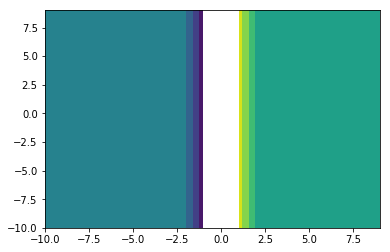

In [84]:
def phi_dip(p,r,r0=[0,0]):
    X = r - r0
     #print(X.shape)
    a = (1/(4*constants.pi*constants.epsilon_0))
    b = np.inner(p,X)
    c = np.abs(X)**3
    d = a * (b/c)
    
    return d

def E_dip(p,r,r0=[0,0]):
    x=r-r0
    a = (1/(4*constants.pi*constants.epsilon_0))
    b=(np.inner(x,p)/(np.abs(x)**5))
    c=3*np.inner(b,x)-(p/(np.abs(x)**3))
    return a*c

x=np.arange(-10,10,1)
y=np.arange(-10,10,1)

p=[0,1]

print(x.shape)

#Calculate the field and potential on the whole meshgrid 
phiarr=[]
for i in range(x.shape[0]):
    phiarr.append(phi_dip(p,xy[:,i]))
phiarr=np.array(phiarr)
xp,yp=np.meshgrid(phiarr[:,0],phiarr[:,1])

plt.contourf(x,y,xp)
#E=E_dip([XX,YY],p)

In [21]:
#This is a hint how to use the tensordot funcion:
r=np.array([XX,YY])
print(r.shape)
p=[0,1]
np.tensordot(p,r,axes=1).shape

(2, 200, 200)


(200, 200)

(10, 7)
(10, 7)
[[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
   0.14112001]
 [ 0.          0.41605468  0.73024466  0.86564528  0.78910575  0.51936561
   0.12246665]
 [ 0.          0.24269492  0.42596966  0.50495217  0.46030478  0.30295872
   0.07143781]
 [ 0.          0.00517593  0.00908462  0.01076907  0.00981688  0.00646118
   0.00152355]
 [-0.         -0.23371137 -0.41020204 -0.48626095 -0.44326622 -0.29174446
  -0.06879348]
 [-0.         -0.41081435 -0.72104702 -0.85474224 -0.77916674 -0.51282405
  -0.12092415]
 [-0.         -0.47931378 -0.84127483 -0.99726246 -0.90908546 -0.59833263
  -0.14108711]
 [-0.         -0.42110103 -0.73910184 -0.87614474 -0.79867686 -0.52566502
  -0.12395205]
 [-0.         -0.25156532 -0.44153867 -0.52340796 -0.47712873 -0.31403174
  -0.07404883]
 [-0.         -0.01552539 -0.02724962 -0.0323022  -0.02944607 -0.01938051
  -0.00456993]]


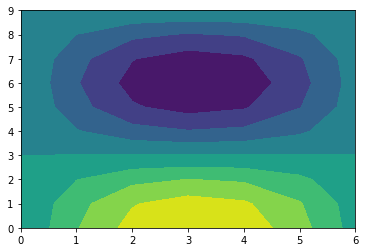

In [74]:
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5 * x) * np.cos(0.52 * y)
print(z.shape)
print(x.shape)
print(z)
plt.contourf(x,y,z)